# Ungraded Lab: Generating Text from Irish Lyrics

In the previous lab, you trained a model on just a single song. You might have found that the output text can quickly become gibberish or repetitive. Even if you tweak the parameters, the model will still be limited by its vocabulary of only a few hundred words. The model will be more flexible if you train it on a much larger corpus and that's what you'll be doing in this lab. You will use lyrics from more Irish songs then see how the generated text looks like. You will also see how this impacts the process from data preparation to model training. Let's get started!

## Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Building the Word Vocabulary

You will first download the lyrics dataset. These will be from a compilation of traditional Irish songs and you can see them [here](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C3/W4/misc/Laurences_generated_poetry.txt).

In [2]:
# The dataset has already beed downloaded for you, so no need to run the following line of code.
# !wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

Next, you will lowercase and split the plain text into a list of sentences:

In [3]:
# Load the dataset
data = open('entrenamiento_basura.txt', encoding='utf-8').read()

# Lowercase and split the text, filtering out empty lines
corpus = [line.strip() for line in data.lower().replace('"', '').split("\n") if line.strip()]

# Preview the result
print(corpus)

['en el intrincado multiverso de henry, el bootcamp de ciencia de datos seguía siendo un hervidero de actividades sospechosas y fraudulentas. la pandilla, liderada por el inconfundible néstor, se reunía en el sótano para planificar sus próximas movidas, rodeados de grafitis de algoritmos y fórmulas mal escritas, reflejando la mente confusa de su líder espiritual, oa. el robo de proyectos era una materia curricular y obligatoria de henry.', 'la pandilla está compuesta por una mezcla muy heterogénea de miembros muy particulares y extraños, a los que se los puede encontrar, inexorablemente, todos los jueves por la noche en la avenida facundo, divagando sobre python y mysql y discutiendo modelos de machine learning con las señoritas con pene.', 'néstor, con su habitual porte fachero y su riñón hiperventilado, organizaba una timba clandestina. recuerden, chicos, un tercio de una verdad es equivalente a dos tercios de una mentira, y tres octavos de incertidumbre equivale a una vida placenter

From here, you can initialize the `TextVectorization` class and generate the vocabulary:

In [4]:
# Initialize the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization()

# Build the vocabulary
vectorize_layer.adapt(corpus)

In [5]:
# Get the vocabulary and its size
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f'{vocabulary}')
print(f'{vocab_size}')

['', '[UNK]', 'de', 'y', 'que', 'la', 'en', 'el', 'un', 'a', 'una', 'su', 'con', 'se', 'para', 'no', 'por', 'los', 'del', 'lo', 'las', 'es', 'como', 'leonardo', 'pero', 'al', 'sus', 'néstor', 'más', 'nahuel', 'mientras', 'era', 'ángel', 'si', 'qué', 'tu', 'o', 'vez', 'datos', 'oa', 'esto', 'siempre', 'sin', 'python', 'le', 'todos', 'había', 'aunque', 'te', 'ser', 'este', 'edgar', 'ya', 'son', 'sobre', 'grupo', 'glados', 'cada', 'alfonz', 'aquí', 'estaba', 'solo', 'tanto', 'menos', 'algo', 'puede', 'está', 'esta', 'día', 'ver', 'tenía', 'tan', 'porque', 'modelos', 'dante', 'cuando', 'también', 'pueden', 'pandilla', 'momento', 'código', 'tú', 'tal', 'permite', 'nuevo', 'funciones', 'fue', 'fracaso', 'ese', 'así', 'vida', 'veces', 'otro', 'hasta', 'has', 'entre', 'donde', 'ciencia', 'además', 'equipo', 'clave', 'claro', 'caos', 'amor', 'realmente', 'oh', 'nadie', 'hacer', 'ha', 'estás', 'decidió', 'counter', 'banda', 'ah', 'éxito', 'tiene', 'sí', 'strike', 'realidad', 'preocupes', 'palabr

## Preprocessing the Dataset

Next, you will generate the inputs and labels for your model. The process will be identical to the previous lab. The `xs` or inputs to the model will be padded sequences, while the `ys` or labels are one-hot encoded arrays.

In [6]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Generate the integer sequence of the current line
	sequence = vectorize_layer(line).numpy()

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(sequence)):

		# Generate the subphrase
		n_gram_sequence = sequence[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

You can then print some of the examples as a sanity check.

In [7]:
# # Get sample sentence
# sentence = corpus[4].split()
# print(f'sample sentence: {sentence}')

# # Initialize token list
# token_list = []

# # Look up the indices of each word and append to the list
# for word in sentence:
#   token_list.append(vocabulary.index(word))

# # Print the token list
# print(token_list)

In [8]:
def sequence_to_text(sequence, vocabulary):
  '''utility to convert integer sequence back to text'''

  # Loop through the integer sequence and look up the word from the vocabulary
  words = [vocabulary[index] for index in sequence]

  # Combine the words into one sentence
  text = tf.strings.reduce_join(words, separator=' ').numpy().decode()

  return text

In [9]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    6    7 2493  470    2  252]
decoded to text:                                                                                                                                  en el intrincado multiverso de henry
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 7


In [10]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    6    7 2493  470    2]
decoded to text:                                                                                                                                   en el intrincado multiverso de
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 252


Lastly, since this is a larger dataset, you can use the tf.data API to speed up the training.

In [11]:
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Put the inputs and labels to a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((xs,ys))

# Optimize the dataset for training
dataset = dataset.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE)

## Build and compile the Model

Next, you will build and compile the model. We placed some of the hyperparameters at the top of the code cell so you can easily tweak it later if you want.

In [12]:
# Parameters
embedding_dim = 150  # 100 en el original
lstm_units = 200  # 150 en el original
learning_rate = 0.008  # 0.01 en el original

# Build the model
model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(max_sequence_len-1,)),
            tf.keras.layers.Embedding(vocab_size, embedding_dim),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units)),
            # tf.keras.layers.Dense(512, activation='relu'),  # No está en el original
            tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 135, 150)          555300    
                                                                 
 bidirectional (Bidirectiona  (None, 400)              561600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 3702)              1484502   
                                                                 
Total params: 2,601,402
Trainable params: 2,601,402
Non-trainable params: 0
_________________________________________________________________


## Train the model

From the model summary above, you'll notice that the number of trainable params is much larger than the one in the previous lab. Consequently, that usually means a slower training time. It will take roughly 7 seconds per epoch with the GPU enabled in Colab and you'll reach around 76% accuracy after 100 epochs.

In [13]:
epochs = 30

# Train the model
history = model.fit(dataset, epochs=epochs)

Epoch 1/30
435/435 [==============================] - 18s 32ms/step - loss: 6.6673 - accuracy: 0.0643
Epoch 2/30
435/435 [==============================] - 13s 29ms/step - loss: 5.3092 - accuracy: 0.1182
Epoch 3/30
435/435 [==============================] - 13s 29ms/step - loss: 4.6628 - accuracy: 0.1873
Epoch 4/30
435/435 [==============================] - 14s 31ms/step - loss: 5.1763 - accuracy: 0.2066
Epoch 5/30
435/435 [==============================] - 14s 31ms/step - loss: 5.0115 - accuracy: 0.2389
Epoch 6/30
435/435 [==============================] - 14s 31ms/step - loss: 4.0107 - accuracy: 0.2824
Epoch 7/30
435/435 [==============================] - 14s 31ms/step - loss: 4.3650 - accuracy: 0.2807
Epoch 8/30
435/435 [==============================] - 13s 30ms/step - loss: 3.7324 - accuracy: 0.3300
Epoch 9/30
435/435 [==============================] - 14s 32ms/step - loss: 3.0013 - accuracy: 0.4025
Epoch 10/30
435/435 [==============================] - 13s 31ms/step - loss: 2.106

You can visualize the accuracy below to see how it fluctuates as the training progresses.

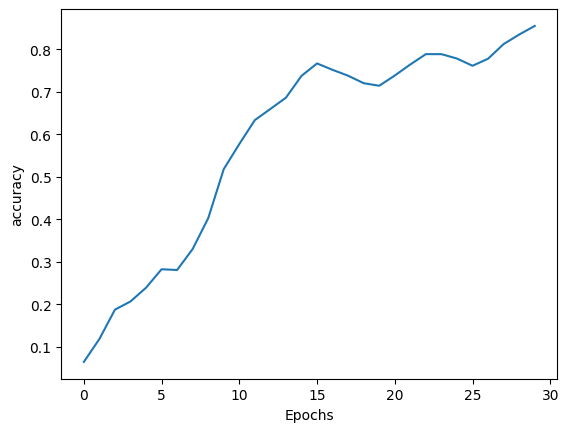

In [14]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

## Generating Text

Now you can let the model make its own songs or poetry! Because it is trained on a much larger corpus, the results below should contain less repetitions as before. The code below picks the next word based on the highest probability output.

In [15]:
def generar_max(texto:str, cant_palabras:int) -> None:
	# Define seed text
	seed_text = texto

	# Define total words to predict
	next_words = cant_palabras

	# Loop until desired length is reached
	for _ in range(next_words):

		# Generate the integer sequence of the current line
		sequence = vectorize_layer(seed_text)

		# Pad the sequence
		sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

		# Feed to the model and get the probabilities for each index
		probabilities = model.predict(sequence, verbose=0)

		# Get the index with the highest probability
		predicted = np.argmax(probabilities, axis=-1)[0]
		# print(np.max(probabilities))
		if np.max(probabilities) <= 0.4:
			seed_text += ". Hijo de puta, no me jodas."
			break
		

		# Ignore if index is 0 because that is just the padding.
		if predicted != 0:

			# Look up the word associated with the index.
			output_word = vocabulary[predicted]

			# Combine with the seed text
			seed_text += " " + output_word

	# Print the result
	print(seed_text)
	return seed_text

Here again is the code that gets the top 3 predictions and picks one at random.

In [76]:
def generar_choice(texto:str, cant_palabras:int, umbral:float) -> None:
  # Define seed text
  seed_text = texto

  # Define total words to predict
  next_words = cant_palabras

  # Loop until desired length is reached
  for _ in range(next_words):

      # Convert the seed text to an integer sequence
      sequence = vectorize_layer(seed_text)

      # Pad the sequence
      sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

      # Feed to the model and get the probabilities for each index
      probabilities = model.predict(sequence, verbose=0)

      p_max = np.sort(probabilities)
      p_max = p_max[0][-5:]
      # print(p_max)
      # break

      probabilidades = []
      for i in p_max:
         if i >= umbral:
            probabilidades.append(i)
      # print(probabilidades)
      # print([i for i in range(1, len(probabilidades)+1)])
      # break
      if len(probabilidades) == 0:
         seed_text += '. Hijo de puta.'
         break
  
      # Pick a random number from [1,2,3]
      choice = np.random.choice([x for x in range(1, len(probabilidades)+1)])

      # Sort the probabilities in ascending order
      # and get the random choice from the end of the array

      predicted = np.argsort(probabilities)[0][-choice]
      # print(predicted)

          
      
      # Ignore if index is 0 because that is just the padding.
      if predicted != 0:

          # Look up the word associated with the index.
          output_word = vocabulary[predicted]

          # Combine with the seed text
          seed_text += " " + output_word
    

  # Print the result
  print(seed_text)
  return seed_text

In [17]:
model.save('prueba_curso.h5')

In [79]:
texto = ['Python', 'TensorFlow', 'Nahuel']
for t in texto:
    salida = generar_choice(t, 100, 0.4)
    print(len(salida.split(' '))-4)
    print()
    print()

Python también admite herencia lo que permite a estas estructuras. Hijo de puta.
9


TensorFlow es una biblioteca de código abierto desarrollada por google diseñada para construir y entrenar modelos de machine learning y deep learning permitiendo a los desarrolladores enfocarse en resolver problemas complejos con flexibilidad y eficiencia cerca de situaciones puede. Hijo de puta.
38


Nahuel brindo por el caos porque sin él ¿quiénes seríamos. Hijo de puta.
9


